## **Exploratory Data Analysis(EDA)**

EDA in Python uses data visualization to draw meaningful patterns and insights. It also involves the preparation of data sets for analysis by removing irregularities in the data.

#### **According to wikipedia:**

   ***"In statistics, exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task."***

Based on the results of EDA, companies also make business decisions, which can have repercussions later.

- If EDA is not done properly then it can hamper the further steps in the machine learning model building process.

- If done well, it may improve the efficiency of everything we do next.

## **Data Sourcing**

This is the very first step of Exploratory Data Analysis.

Data Sourcing is the process of finding and loading the data into our system. 

1). Private Data

2). Public Data

**Private Data**

As the name suggests, private data is given by private organizations. There are some security and privacy concerns attached to it. This type of data is used for mainly organizations internal analysis.

**Public Data**

This type of Data is available to everyone. We can find this in government websites and public organizations etc. Anyone can access this data, we do not need any special permissions or approval.

** Famous Sources of Public Data: **
- https://www.kaggle.com/
- https://archive.ics.uci.edu/ml/index.php
- https://github.com/awesomedata/awesome-public-datasets   

## **2. Data Cleaning**

After completing the Data Sourcing, the next step in the process of EDA is Data Cleaning. It is very important to get rid of the irregularities and clean the data after sourcing it into our system.

Irregularities are of different types of data.

- Missing Values
- Incorrect Format
- Incorrect Headers
- Anomalies/Outliers

#### **Data Cleaning Simple steps.**

**import the necessary libraries**

In [4]:
#import the useful libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
# Read the data set of "Marketing Analysis" in data.
data = pd.read_csv("Marketing_Analysis.csv");

In [ ]:
# data1 = np.loadtxt("Marketing_Analysis.csv"); 

In [9]:
# Printing the data
# data

In [33]:
# Printing top 
data.head(6) 


,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
5,4,47,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no


In [34]:
# Printing the data
# data.tail(2) 

If we observe the above dataset, there are some discrepancies in the Column header for the first 2 rows. The correct data is from the index number 1. 

So, we have to fix the first two rows.

This is called Fixing the Rows and Columns. Let’s ignore the first two rows and load the data again.

In [39]:
data = pd.read_csv("Marketing_Analysis.csv",skiprows = 2)

#print the head of the data frame.
# data 

**Following are the steps to be taken while Fixing Rows and Columns:**

- Delete Summary Rows and Columns in the Dataset.
- Delete Header and Footer Rows on every page.
- Delete Extra Rows like blank rows, page numbers, etc.
- We can merge different columns if it makes for better understanding of the data

Similarly, we can also split one column into multiple columns based on our requirements or understanding.

**Remember** to add Column names, it is very important to have column names to the dataset.

Now if we observe the above dataset, the ""customerid"" column has of no importance to our analysis, and also the **jobedu** column has both the information of job and education in it.

So, what we’ll do with is, we’ll drop the customerid column and we’ll split the jobedu column into two other columns job and education and after that, we’ll drop the jobedu column as well. 

In [41]:
# Drop the customer id as it is of no use.
data.drop('customerid', axis = 1, inplace = True)

#Extract job  & Education in newly from "jobedu" column.
data['job']= data["jobedu"].apply(lambda x: x.split(",")[0])
data['education']= data["jobedu"].apply(lambda x: x.split(",")[1])

# Drop the "jobedu" column from the dataframe.
data.drop('jobedu', axis = 1, inplace = True)
data.head(6)

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown
5,35.0,100000,231,married,yes,no,yes,no,unknown,5,"may, 2017",139 sec,1,-1,0,unknown,no,management,tertiary


In [37]:
data.isnull().sum()

age          20
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

In [20]:
data = data[~data.age.isnull()].copy()

# Checking the missing values in the dataset.
data.isnull().sum()

age           0
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

### **Outliers**

We have seen how to fix missing values, now let’s see how to handle outliers in the dataset.

**Outliers are the values that are far beyond the next nearest data points.**

There are two types of outliers:

**Univariate outliers:** Univariate outliers are the data points whose values lie beyond the range of expected values based on one variable.

**Multivariate outliers:** While plotting data, some values of one variable may not lie beyond the expected range, but when you plot the data with some other variable, these values may lie far from the expected value.


In [40]:
data.head(3)

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


**Assignment, Make the following plots:**

- Under univariate Analysis,analyze the Education Variable from the dataset.Make use of a **Pie Chart** 

- Under bivariate Analysis,

 **a). Numeric-Numeric Analysis:**
 - Scatter Plot, 
 - Pair Plot
 - Correlation Matrix.
 
 **Numeric - Categorical Analysis**
  - Analyzing the one numeric variable and one categorical variable from a dataset is known as numeric-categorical analysis. We analyze them mainly using mean, median, and box plots.
  
  
  **Categorical — Categorical Analysis**
    

Since we cannot use more than two variables as x-axis and y-axis in Scatter and Pair Plots, it is difficult to see the relation between three numerical variables in a single graph. 

In such cases we use the correlation matrix.

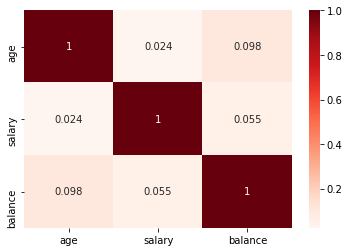

In [43]:
# Creating a matrix using age, salry, balance as rows and columns
data[['age','salary','balance']].corr()

#plot the correlation matrix of salary, balance and age in data dataframe.
sns.heatmap(data[['age','salary','balance']].corr(), annot=True, cmap = 'Reds');
# plt.show()

**Multivariate Analysis**

If we analyze data by taking more than two variables/columns into consideration from a dataset, it is known as Multivariate Analysis.

Example, like if we want to see how **‘Education’, ‘Marital’,** and **‘Response_rate’** vary with each other.

In such a situation, we can make use of heat maps


First, we’ll create a pivot table with the three columns and after that, we’ll create a heatmap.

In [47]:
data['response_rate'] = np.where(data.response=='yes',1,0)
data.response_rate.value_counts() 

0    39924
1     5287
Name: response_rate, dtype: int64

marital    divorced   married    single
education                              
primary    0.138298  0.075486  0.106682
secondary  0.103375  0.094626  0.129213
tertiary   0.138001  0.129724  0.183431
unknown    0.142012  0.122414  0.162879


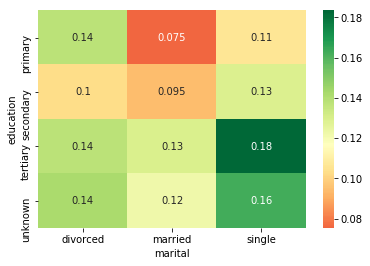

In [49]:
result = pd.pivot_table(data=data, index='education', columns='marital',values='response_rate')
print(result)

#create heat map of education vs marital vs response_rate
sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)
plt.show()


**Based on the Heatmap we can infer that the married people with primary education are less likely to respond positively for the survey and single people with tertiary education are most likely to respond positively to the survey.**